# Assignment 1

Fengdi Li

## 1. Feedforward: Building a ReLu 2 Layer neural network


- Plot (draw) a network with:
    - 2 inputs,
    - 2 hidden layers (where the first layer contains 3 hidden units and the second contains 2 hidden units) and a
    - 3-class output (use a softmax function)

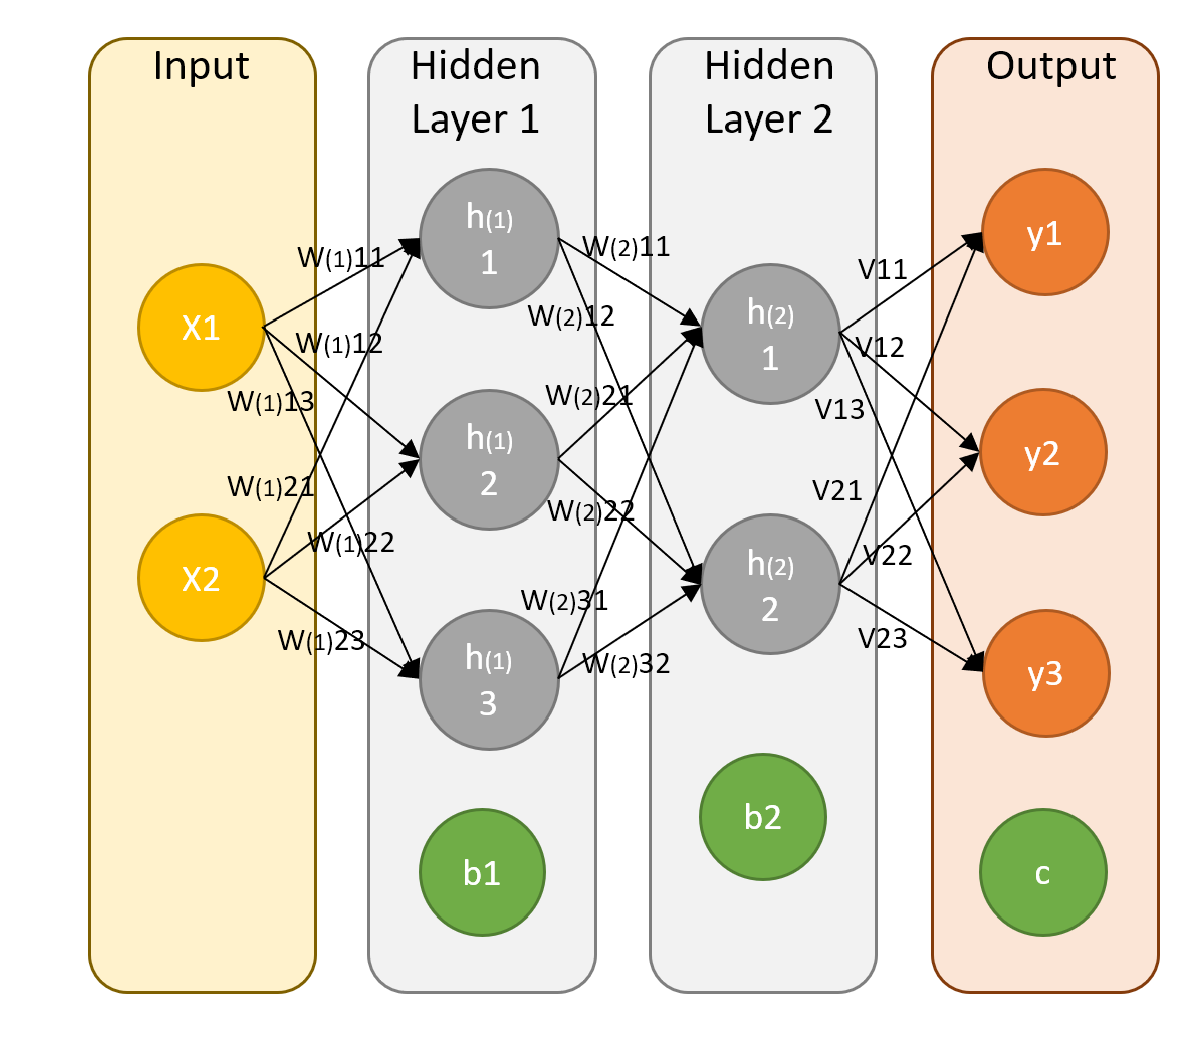

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
img = imread('NNet.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

- Write out the mathematical equation for this network

$h_{1i} = max(0, x_1w^{(1)}_{1i} + x_2w^{(1)}_{2i} + b^{(1)}_i)$ for $i = 1, 2, 3$

$h_{2j} = max(0, h^{(1)}_{1}w^{(2)}_{1j} + h^{(1)}_{2}w^{(2)}_{2j} + h^{(1)}_{3}w^{(2)}_{3j} + b^{(2)}_j)$ for $j = 1, 2$

$y_k = Softmax(h^{(2)}_{1}v_{1k} + h^{(2)}_{2}v_{2k} + c_k)=\frac{exp(h^{(2)}_{1}v_{1k} + h^{(2)}_{2}v_{2k} + c_k)}{\sum_{i = 1}^3{exp(h^{(2)}_{1}v_{1i} + h^{(2)}_{2}v_{2i} + c_k)}}$ for $k = 1, 2, 3$

- Write out the function in python, call it ff_nn_2_ReLu(...)

In [2]:
import numpy as np

In [208]:
def ff_nn_2_ReLu(x, parameters):
    w1, b1, w2, b2, v, c = parameters
    relu = np.vectorize(lambda z: np.fmax(0,z))
    softmax = lambda z: np.exp(z)/np.sum(np.exp(z), axis = 1, 
                                         keepdims=True)
    a1 = x.dot(w1) + b1
    h1 = relu(a1)
    a2 = h1.dot(w2) + b2
    h2 = relu(a2)
    a3 = h2.dot(v) + c
    out = np.round(softmax(a3), 2)
    return h1, h2, out

- Suppose you have the following set of weight matrices and inputs, what are the class probabilities associated with the forward pass of each sample?

In [211]:
X = np.array(([1, 0, 0], [-1, -1, 1]))
W1 = np.array(([1, 0], [-1, 0], [0, 0.5]))
W2 = np.array(([1, 0, 0], [-1, -1, 0]))
V = np.array(([1, 1], [0, 0], [-1, -1]))
b1 = np.array([0, 0, 1])
b2 = np.array([1, -1])
c = np.array([1, 0, 0])
parameters = [W1.T, b1, W2.T, b2, V.T, c]
ff_nn_2_ReLu(X.T, parameters)[-1]

array([[0.95, 0.05, 0.01],
       [0.84, 0.11, 0.04],
       [0.84, 0.11, 0.04]])

## 2. Gradient Descent

- What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x} = 2(x-1) + 200\cdot 2x\cdot(x^2-y) = 400x^3-400xy+2x-2$

$\frac{\partial f}{\partial y} = 200(y-x^2)=-200x^2+200y$

- Create a visualization of the contours of the Rosenbrock function.

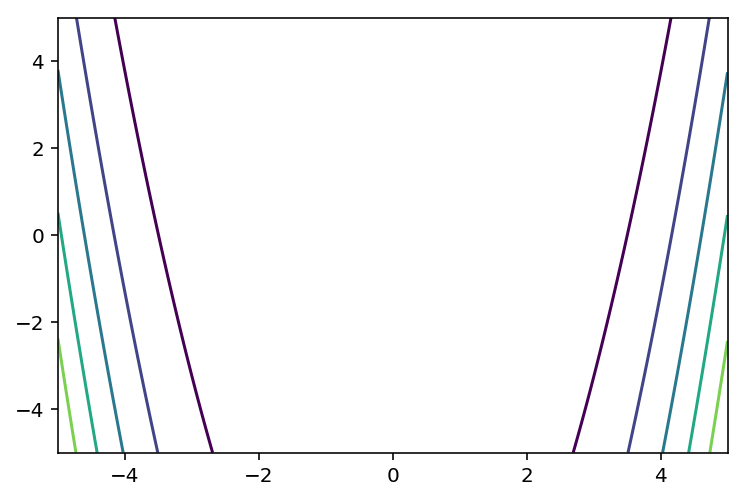

In [53]:
# --- Paraboloid Function ---
delta = 0.005
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

- Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates

In [54]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2 
    df_dy = -200*x**2+200*y
    return np.array([df_dx, df_dy])

In [55]:
# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=50, learning_rate=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


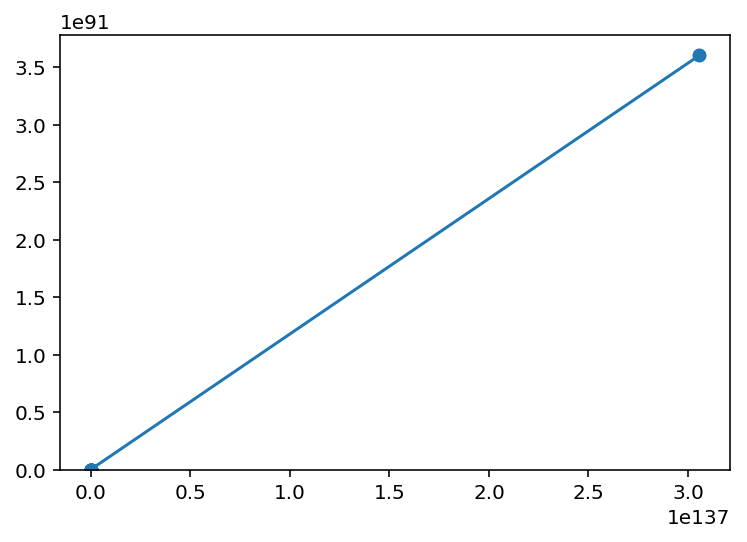

In [56]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.01) ## learning rate = 0.01

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

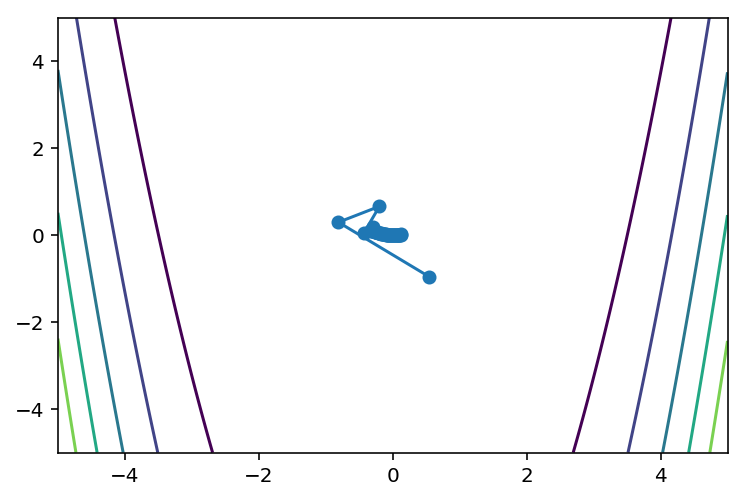

In [57]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.005) ## learning rate = 0.005

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

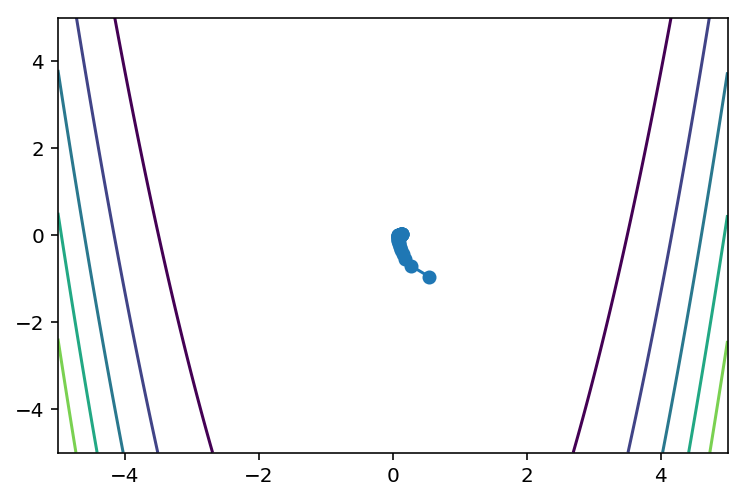

In [58]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.001)  ## learning rate = 0.001

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

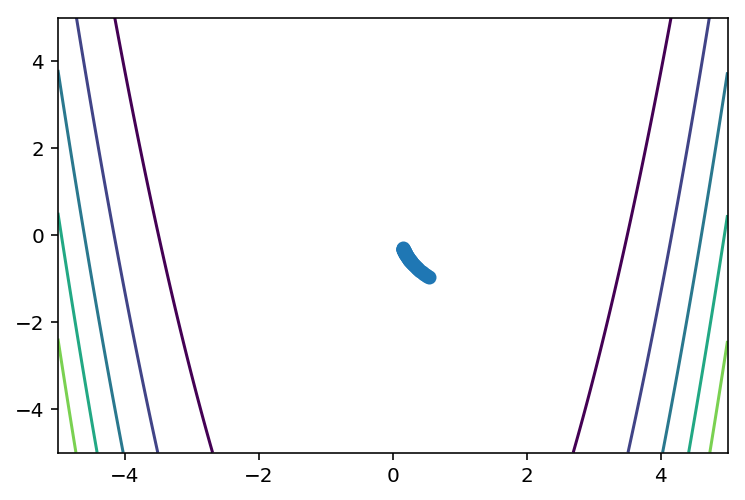

In [59]:
# --- Visualize Trajectory ---
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.0001)  ## learning rate = 0.0001

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

- Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters

In [60]:
# --- Gradient with momentum ---
def grad_descent_with_momentum(starting_point=None, iterations=50, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


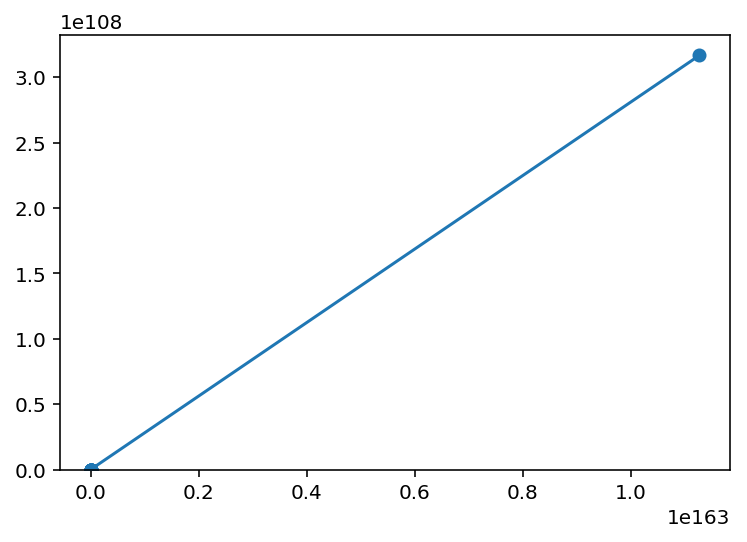

In [62]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.005, alpha=.8) ## episilon = 0.005, alpha = 0.8

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

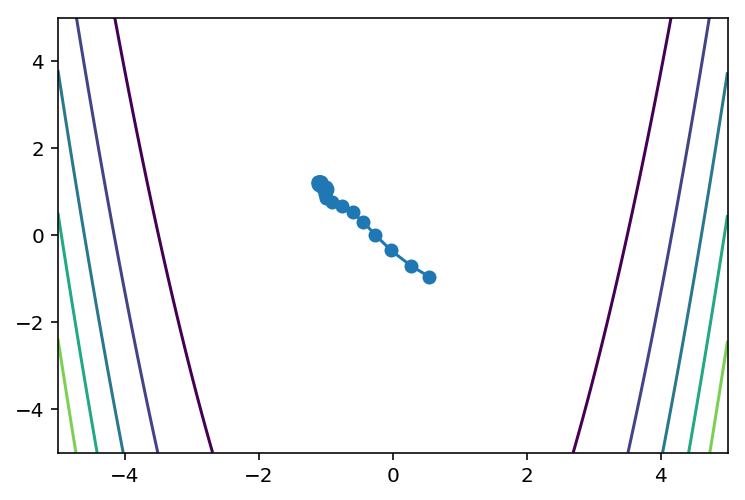

In [63]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.001, alpha=.8) ## episilon = 0.001, alpha = 0.8

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

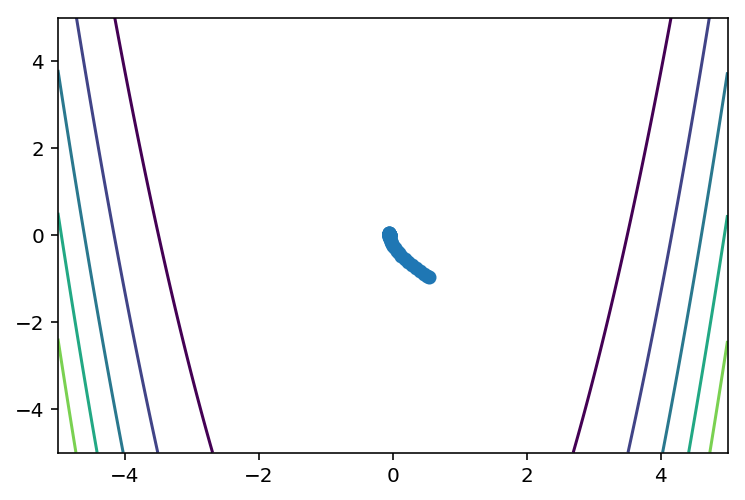

In [64]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=.8)  ## episilon = 0.0001, alpha = 0.8

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

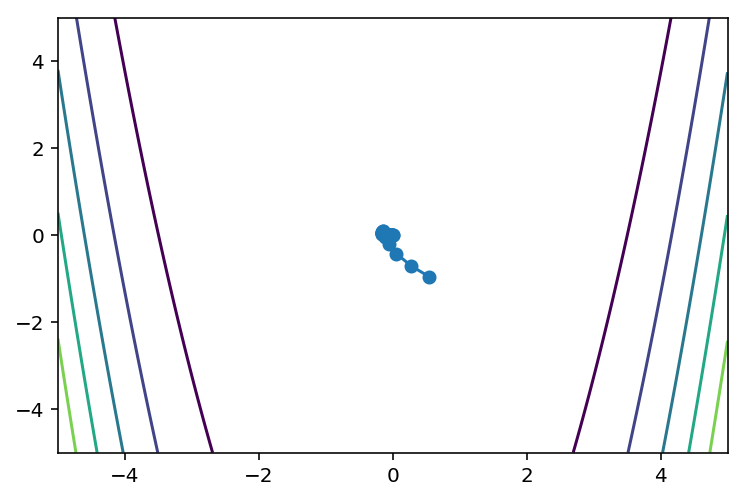

In [66]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.001, alpha=.5)  ## episilon = 0.005, alpha = 0.5

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

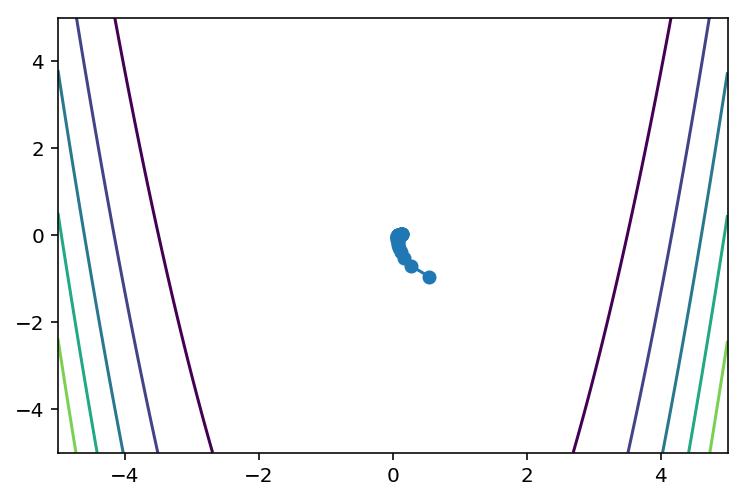

In [70]:
# --- Visualizing trajectory --
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=0.001, alpha=.1)  ## episilon = 0.001, alpha = 0.1

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3. Backprop

- For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

Assume the number of sample equals to $n$:

$\frac{\partial L_n(y,\hat y)}{\partial c_s}=(\mathbb 1\rvert_{s_n=true class}-\hat y_s)$, for $s = 1, 2, 3$

$\frac{\partial L_n(y,\hat y)}{\partial V_{ks}} = (\mathbb 1\rvert_{s_n=true class}-\hat y_s)h^{(2)}_k$, for $k = 1, 2$

$\frac{\partial L_n(y,\hat y)}{\partial b^{(2)}_k} = \sum_s(\mathbb 1\rvert_{s_n=true class}-\hat y_s)V_{ks}\mathbb 1_{a_k>0}$

$\frac{\partial L_n(y,\hat y)}{\partial W^{(2)}_{jk}} = \sum_s(\mathbb 1\rvert_{s_n=true class}-\hat y_s)V_{ks}\mathbb 1_{a_k>0} h^{(1)}_{j}$, for $j = 1,2,3$

$\frac{\partial L_n(y,\hat y)}{\partial b^{(1)}_j} = \sum_s\sum_k(\mathbb 1\rvert_{s_n=true class}-\hat y_s)V_{ks}W^{(2)}_{jk}\mathbb 1_{a_k>0}\mathbb 1_{a_j>0} $

$\frac{\partial L_n(y,\hat y)}{\partial W^{(1)}_{ij}} = \sum_s\sum_k(\mathbb 1\rvert_{s_n=true class}-\hat y_s)V_{ks}W^{(2)}_{jk}\mathbb 1_{a_k>0} \mathbb 1_{a_j>0} x_{i}$, for $i = 1,2$

- Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [212]:
def grad(X,H1,H2,Y,Y_hat,parameters):  
    # Unpacking parameters    
    W1,b1,W2,b2,V,c = parameters

    # Gradients - ReLU
    dV = H2.T.dot(Y_hat - Y)
    dc = (Y_hat - Y).sum(axis=0)
    dW2 = H1.T.dot(((Y_hat - Y).dot(V.T) * (H2 > 0))) 
    db2 = ((Y_hat - Y).dot(V.T) * (H2 > 0)).sum(axis=0)
    dW1 = X.T.dot((((Y_hat - Y).dot(V.T)* (H2 > 0)).dot(W2.T)* (H1 > 0)))
    db1 = (((Y_hat - Y).dot(V.T)* (H2 > 0)).dot(W2.T)* (H1 > 0)).sum(axis=0)    
    
    #return {'dV':dV,'db2':db2,'dW':dW,'db1':db1}
    return dW1,db1,dW2,db2,dV,dc

- Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters that you'll use for fitting your network. Plot your sample dataset, coloring data points by their respective class.

In [213]:
import pandas as pd

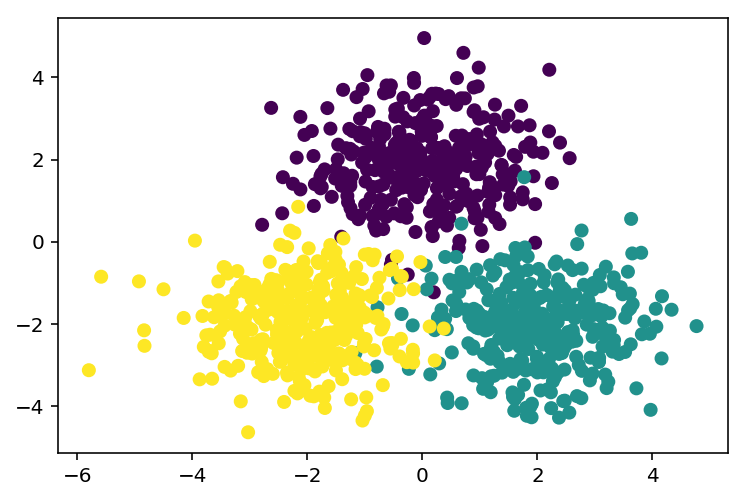

In [214]:
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
    # Plot?
    if plot:
        plt.scatter(xs[:1,:],xs[1:,:], c = cl)

    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#  Generate data for network    #
#################################
X, Y, cl = gen_gmm_data(plot = True)

- Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [215]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#   Parameter Update: Momentum + Regularization   #
###################################################
def parameter_update(parameters,  grads, 
                     momentum_params = [0,0,0,0,0,0], 
                     lr = 1, reg = 0, alpha = 0):
    # Unpacking parameters            
    W1,b1,W2,b2,V,c = parameters
    dW1,db1,dW2,db2,dV,dc = grads
    vW1,vb1,vW2,vb2,vV,vc = momentum_params
    
    # Momentum update
    vW1  = alpha * vW1 -  lr * (dW1 + reg*W1)
    vb1 = alpha * vb1 - lr * (db1 + reg*b1)
    vW2  = alpha * vW2 -  lr * (dW2 + reg*W2)
    vb2 = alpha * vb2 - lr * (db2 + reg*b2)
    vV  = alpha * vV -  lr * (dV + reg*V)
    vc = alpha * vc - lr * (dc + reg*c)
    momentum_params = [vW1,vb1,vW2,vb2,vV,vc] 
    
    # Parameter updates
    W1  = W1  + vW1
    b1 = b1 + vb1
    W2  = W2  + vW2
    b2 = b2 + vb2    
    V  = V  + vV
    c = c + vc
    parameters =[W1,b1,W2,b2,V,c]

             
    return parameters, momentum_params

In [224]:
# %%%%%%%%%%%%%%%%%%%%%
#  Utility Functions  #
# #####################
def predict(Y_hat):
    return np.argmax(Y_hat, axis=1)


def error_rate(Y_hat, cl):
    prediction = predict(Y_hat)
    return np.mean(prediction != cl)


def cost(Y_hat, Y):
    tot = Y * np.log(Y_hat)
    return -tot.sum()

In [225]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#      Building the model     #
###############################
def run_model(X, Y, cl,
              iterations = 1000,
              regularization_include = False,
              momentum_include = False):    

    ###################################
    #   Initial values for network    #
    ###################################
    # Intialize weights
    np.random.seed(123)
    W1 = np.random.randn(6).reshape(3,2)
    b1 = np.array([0,0,0])
    W2 = np.random.randn(6).reshape(2,3)
    b2 = np.array([0,0])
    V = np.random.randn(6).reshape(3,2)
    c = np.array([0,0,0])
    parameters = [W1.T, b1, W2.T, b2, V.T, c]
    
    # Hyperparameters 
    lr = 0.0001 # learning rate
    reg = 0.01 * regularization_include
    
    # Momentum parameters
    alpha = 0.9 * momentum_include
    vV = 0
    vc = 0
    vW2 = 0
    vb2 = 0
    vW1 = 0
    vb1 = 0
    momentum_params = [vW1,vb1,vW2,vb2,vV,vc]    
    
    # Place holder for losses
    losses = []
    errors = []    
   
    ###################
    #   Run the model #
    ###################
    for i in range(0,iterations):
        #print(i)
        # -- Forward propoagation --
        H1,H2,Y_hat = ff_nn_2_ReLu(X,parameters)
        
        # -- Backward propagation --
        # Gradient calculation
        grads_in = grad(X,H1,H2,Y,Y_hat,parameters)
        # Parameter update
        new_params, new_mom_param = parameter_update(parameters, grads_in, 
                             momentum_params, alpha = alpha, 
                             lr = lr, reg = reg)
        
        # -- Updating values --
        H1,H2,Y_hat = ff_nn_2_ReLu(X,new_params)
        parameters = new_params
        momentum_params = new_mom_param
        
        # Prediction and Error rate            
        errs_i = error_rate(Y_hat, cl) ; errors.append(errs_i)
        loss_i = cost(Y_hat, Y); losses.append(loss_i)
        if ((i % 25) == 0):    
            print(
            '''
            ---- Iteration {i} ----
            Error rate : {er}
            Loss: {loss}
            '''.format(i= i, er = errs_i, loss = loss_i))
    plt.plot(losses)
    return {"errors":errs_i, "loss_i":loss_i, "parameters":parameters}


            ---- Iteration 0 ----
            Error rate : 0.7767767767767768
            Loss: 1110.777768881103
            

            ---- Iteration 25 ----
            Error rate : 0.6626626626626627
            Loss: 1102.489074472399
            

            ---- Iteration 50 ----
            Error rate : 0.6556556556556556
            Loss: 1082.0979124723708
            


C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\lifen\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  



            ---- Iteration 75 ----
            Error rate : 0.34234234234234234
            Loss: nan
            


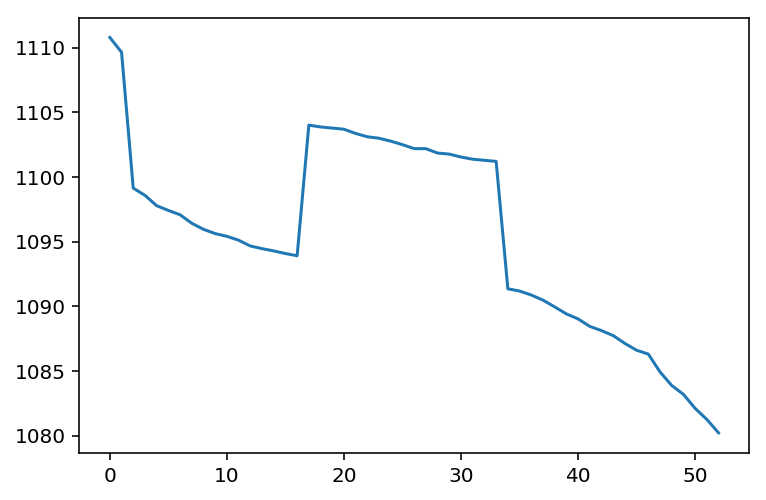

In [226]:
result = run_model(X,Y,cl, iterations = 100,
          regularization_include = False,
          momentum_include = False)

### Note: As the calculation of np.log(Y_hat) encountered zero shown above, by adding a extremely small value i.e. 0.000001 to Y_hat, the result will be presented as follows:


            ---- Iteration 0 ----
            Error rate : 0.7767767767767768
            Loss: 1110.774689701927
            

            ---- Iteration 25 ----
            Error rate : 0.6626626626626627
            Loss: 1102.486044310498
            

            ---- Iteration 50 ----
            Error rate : 0.6556556556556556
            Loss: 1082.094915152894
            

            ---- Iteration 75 ----
            Error rate : 0.34234234234234234
            Loss: 900.7304838172676
            

            ---- Iteration 100 ----
            Error rate : 0.32732732732732733
            Loss: 684.6685417300437
            

            ---- Iteration 125 ----
            Error rate : 0.3033033033033033
            Loss: 617.9601067009881
            

            ---- Iteration 150 ----
            Error rate : 0.2822822822822823
            Loss: 589.9973964793488
            

            ---- Iteration 175 ----
            Error rate : 0.26626626626626626
           

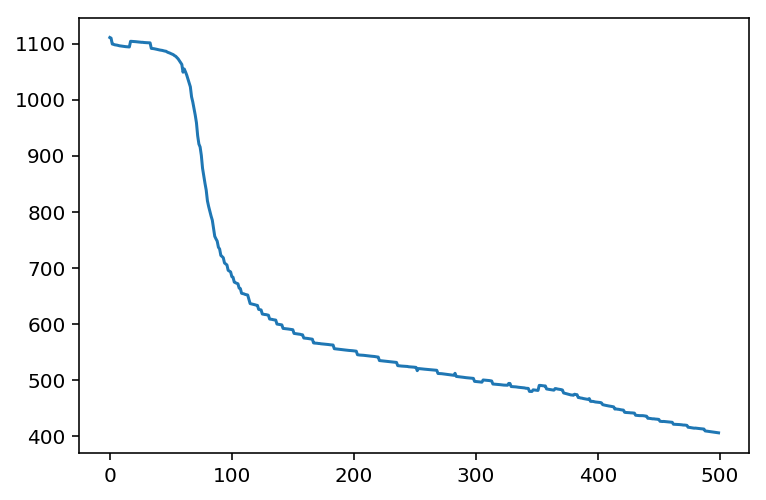

In [227]:
def cost(Y_hat, Y):
    tot = Y * np.log(Y_hat+0.000001)
    return -tot.sum()
result = run_model(X,Y,cl, iterations = 500,
          regularization_include = False,
          momentum_include = False)

- Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more effciently.


            ---- Iteration 0 ----
            Error rate : 0.7767767767767768
            Loss: 1110.774689701927
            

            ---- Iteration 25 ----
            Error rate : 0.3483483483483483
            Loss: 802.8053479917066
            

            ---- Iteration 50 ----
            Error rate : 0.34534534534534533
            Loss: 523.1214418732927
            

            ---- Iteration 75 ----
            Error rate : 0.32232232232232233
            Loss: 510.36987554336145
            

            ---- Iteration 100 ----
            Error rate : 0.32232232232232233
            Loss: 507.9968859350571
            

            ---- Iteration 125 ----
            Error rate : 0.3133133133133133
            Loss: 501.59344789942304
            

            ---- Iteration 150 ----
            Error rate : 0.25625625625625625
            Loss: 496.0944244396017
            

            ---- Iteration 175 ----
            Error rate : 0.11211211211211211
       

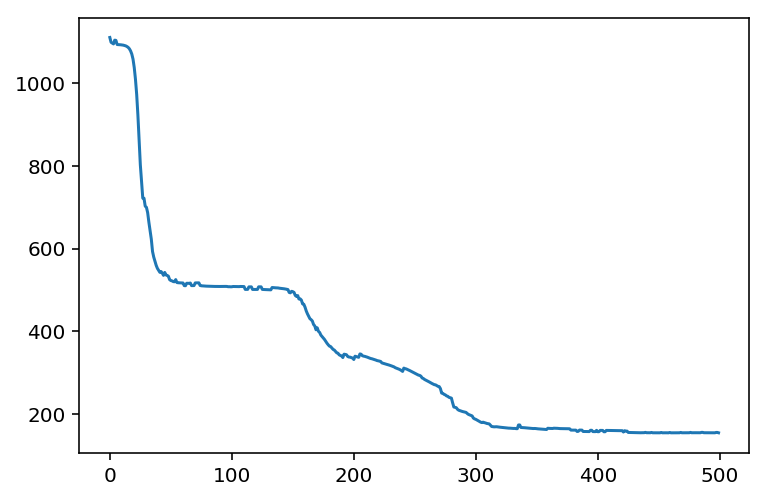

In [228]:
result = run_model(X,Y,cl, iterations = 500,
          regularization_include = False,
          momentum_include = True)

With momentum, the converge is more efficient. From the two graphs above, with momentum, the Log Loss decreased to 400 around iteration 180, while without momentum, the Log Loss decreased to 400 around iteration 500.